In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [15]:
dataset = pd.read_csv("seed.txt", sep="\t",
                        names=["feature1", "feature2", "feature3", "feature4", "feature5", "feature6", "feature7", "class"],
                        )
for i in range(7):
    dataset[f"feature{i+1}"] = (dataset[f"feature{i+1}"] - dataset[f"feature{i+1}"].mean()) / dataset[f"feature{i+1}"].std()    
dataset = dataset.values.tolist()
for i in range(len(dataset)):
    if dataset[i][-1] == 1:
        dataset[i][-1] = [1, 0, 0]
    elif dataset[i][-1] == 2:
        dataset[i][-1] = [0, 1, 0]
    elif dataset[i][-1] == 3:
        dataset[i][-1] = [0, 0, 1]
    else:
        dataset[i].drop()
dataset = pd.DataFrame(dataset)
dataset

,0,1,2,3,4,5,6,7
0,0.141759,0.214949,0.000060,0.303493,0.141364,-0.983801,-0.382663,"[1, 0, 0]"
1,0.011161,0.008204,0.427494,-0.168223,0.196962,-1.783904,-0.919816,"[1, 0, 0]"
2,-0.191609,-0.359342,1.438945,-0.761817,0.207552,-0.665888,-1.186357,"[1, 0, 0]"
3,-0.346264,-0.474200,1.036904,-0.687336,0.318747,-0.958528,-1.227051,"[1, 0, 0]"
4,0.444196,0.329807,1.371233,0.066507,0.803240,-1.559768,-0.474223,"[1, 0, 0]"
...,...,...,...,...,...,...,...,...
205,-0.913333,-1.040834,0.308997,-1.109397,-0.734959,-0.046025,-1.094797,"[0, 0, 1]"
206,-1.243264,-1.285864,-0.842110,-1.102626,-1.227395,0.415547,-0.824186,"[0, 0, 1]"
207,-0.566218,-0.688602,0.732199,-0.885953,-0.070436,3.069254,-0.716349,"[0, 0, 1]"
208,-1.033620,-1.033176,-0.799790,-1.023631,-1.118847,-0.067973,-0.740765,"[0, 0, 1]"


In [23]:
class SoftMaxRegression:
    def __init__(self, data, test_data, iteration, alpha):
        self.number_of_class = 3

        self.weights = np.random.randn(self.number_of_class, 8)
        self.X = data.to_numpy()[:,:7]
        self.X = np.c_[self.X, np.ones(self.X.shape[0])]
        self.y = data.to_numpy()[:,7]
        self.X_test = test_data.to_numpy()[:,:7]
        self.X_test = np.c_[self.X_test, np.ones(self.X_test.shape[0])]
        self.y_test = test_data.to_numpy()[:,7] 
        self.cost_list = [0 for i in range(iteration+1)]
        self.iteration = iteration
        self.alpha = alpha
        self.real_iteration = 0
        
    def softmax(self, X):
        nominator = np.e ** (self.weights.dot(X).astype(float))
        denominator = (np.e ** (self.weights.dot(X).astype(float))).sum()
        return nominator / denominator

    def cost(self):
        m, n = self.X.shape
        total_error = 0
        for i in range(m):
            cross_entropy = - (np.dot(self.y[i], np.log(self.softmax(self.X[i]))).sum())
            total_error += cross_entropy
        return total_error

    def gradient_calc(self):
        m, n = self.X.shape
        weights_gradient = []
        for j in range(self.number_of_class):
            class_j_label = [1 if i == j else 0 for i in range(self.number_of_class)]
            x_grad = 0
            for i in range(m):   
                # print(x_grad)  
                if class_j_label == self.y[i]:
                    # print(self.X[i] * (1 - self.softmax(self.X[i])[j]))
                    x_grad += self.X[i] * (1 - self.softmax(self.X[i])[j]).astype(float)
                else:
                    # print(self.X[i] * (0 - self.softmax(self.X[i])[j]))
                    x_grad += self.X[i] * (0 - self.softmax(self.X[i])[j]).astype(float)
            weights_gradient.append(x_grad)
        # print(weights_gradient)
        return weights_gradient
    
    def train(self):
        m, n = self.X.shape
        iteration = 0
        while True:
            self.cost_list[iteration] = self.cost()
            weights_gradient = self.gradient_calc()
            for j in range(self.number_of_class):
                for i in range(n):
                    self.weights[j][i] = self.weights[j][i] + self.alpha * weights_gradient[j][i]
            self.real_iteration = iteration
            iteration+=1
            # print(abs(self.cost_list[iteration-1]-self.cost_list[iteration-2]))
            if iteration >= self.iteration or abs(self.cost_list[iteration-1]-self.cost_list[iteration-2]) <= 0.001:
                break
    
    def draw_cost_function(self):
        x = [i for i in range(0, self.real_iteration+1, 1)]
        plt.plot(x, self.cost_list[:self.real_iteration+1])
    
    def accuracy_error(self):
        test_true = 0
        # print(self.X_test[0], self.y_test[0])
        for i in range(len(self.X_test)):
            
            softmax_values = list(self.softmax(self.X_test[i]))
            predict = softmax_values.index(max(softmax_values)) 
            # print(softmax_values, predict, self.y_test[i])
            if predict == self.y_test[i].index(1) :
                test_true += 1
        train_true = 0
        for i in range(len(self.X)):
            softmax_values = list(self.softmax(self.X[i]))
            predict = softmax_values.index(max(softmax_values))
            # print(softmax_values, predict, self.y[i])
            if predict == self.y[i].index(1):
                train_true += 1
                
        print ("Accuracy on test:", (test_true/self.X_test.shape[0])*100)
        print ("Accuracy on train:",(train_true/self.X.shape[0])*100)
        print ("Error on test:", (1 - test_true/self.X_test.shape[0])*100)
        print ("Error on train:",(1 - train_true/self.X.shape[0])*100)

Accuracy on test: 100.0
Accuracy on train: 97.02380952380952
Error on test: 0.0
Error on train: 2.9761904761904767


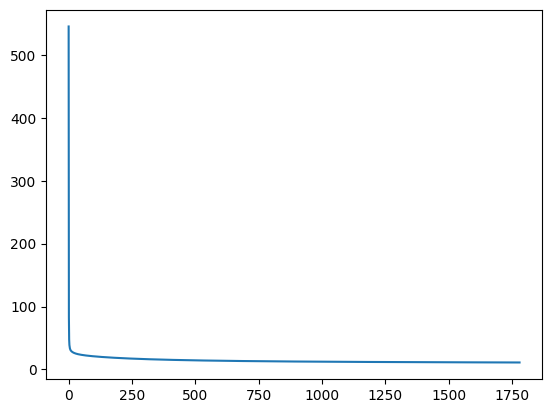

In [24]:
dataset = shuffle(dataset)

dataset = pd.DataFrame(dataset)
train, test = dataset[:int(0.8*len(dataset))], dataset[int(0.8*len(dataset)):]
softmax = SoftMaxRegression(train, test, 10000, 0.01)
softmax.train()
softmax.draw_cost_function()
softmax.accuracy_error()

In [20]:
def softmax(X):
    X = np.array(X)
    nominator = np.e ** (X)
    denominator = (np.e ** (X)).sum()
    return nominator / denominator
softmax([1, 2, 3, 6])

array([0.00626879, 0.01704033, 0.04632042, 0.93037047])